In [2]:
import numpy as np 
import cupy as cp
import matplotlib.pyplot as plt

In [5]:
import import_ipynb
import importlib
from importlib import reload
from sklearn.utils import shuffle
import util
import process

importing Jupyter notebook from util.ipynb
importing Jupyter notebook from process.ipynb


In [6]:
from process import get_labels, get_train_test_data, get_binary_data, get_binary_data

In [30]:
from util import sigmoid, bin_cross_entropy,bin_cross_entropy_mean, error_rate, init_weight_bias, classification_rate, to_indicator, softmax

In [34]:
class Logistic() :
    def __init__(self):
        pass

    def fit(self, X, T, learning_rate = 0.001, show_fig = False,epochs = 1000, usecupy = False, percent_val = 0.2, l1=0.1) :
        N, D = X.shape
        K = 2
        
        if usecupy :
            module = importlib.import_module('cupy')
        else :
            module = importlib.import_module('numpy')
        X = module.array(X)
        T = module.array(T)
        
        valid_index = int(0.1 * N)
        X, T = shuffle(X, T)
        Xvaild, Tvalid = X[-valid_index:], T[-valid_index:]
        X, T = X[:-valid_index], T[:-valid_index]
        T_ind = to_indicator(T, K, usecupy)
        T_ind_valid = to_indicator(Tvalid, K, usecupy)
        
        
            
        self.W = module.random.randn(D, K)/ module.sqrt(D + K)
        self.b = module.zeros(K)
        print(type(Xvaild))
        
        train_costs = []
        val_costs = []
        
        train_accuracies = []
        val_accuracies = []
        
        for i in range(epochs) :
            Y = self.forward(X, usecupy)
            if usecupy :
                train_cost = bin_cross_entropy_mean(T_ind, Y, usecupy)
                train_cost = train_cost.get()
                train_accuracy = classification_rate(np.argmax(Y.get(), axis = 1), T.get())
            else :
                train_cost = bin_cross_entropy_mean(T_ind, Y)
                train_accuracy = classification_rate(module.argmax(Y, axis = 1), T)
            
            train_costs.append(train_cost)
            train_accuracies.append(train_accuracy)
            
            self.W -= learning_rate * (X.T.dot(Y - T_ind) + l1 * module.sign(self.W))  #we derived without dropping neg sign
            self.b -= learning_rate * ((Y - T_ind).sum(axis = 0) + l1 * self.b)
            
            Yvalid = self.forward(Xvaild, usecupy)
            if usecupy :
                val_cost = bin_cross_entropy_mean(T_ind_valid, Yvalid, usecupy)
                val_cost= val_cost.get()
                val_accuracy = classification_rate(np.argmax(Yvalid.get(), axis = 1), Tvalid.get())
            else :
                val_cost = bin_cross_entropy_mean(T_ind_valid, Yvalid)
                val_accuracy = classification_rate(module.argmax(Yvalid, axis = 1), Tvalid)
                
            val_costs.append(val_cost)
            val_accuracies.append(val_accuracy)
            
            if i % 100 == 0 :
                print(f'epoch = {i}, train_cost : {train_cost}, val_cost {val_cost}, train_accuracy = {train_accuracy}, val_accuracy {val_accuracy}')
        
        if show_fig:
            plt.figure()
            plt.title('Costs')
            plt.ylabel('cost')
            plt.xlabel('epochs')
            plt.plot(train_costs, label = 'train_costs')
            plt.plot(val_costs,label= 'val_costs')
            plt.legend()
            plt.show()
            
            plt.figure()
            plt.title('Accuracy')
            plt.plot(train_accuracies, label = 'train_acc')
            plt.plot(val_accuracies,label= 'val_acc')
            plt.legend()
            plt.show()
            
    def forward(self, X, usecupy = False) :
        return softmax(X.dot(self.W) + self.b, usecupy)
    
    def save(name) :
        np.savez(name, self.W, self.b)
        
    def load(name) :
        return np.load(name)

In [9]:
X, T = get_binary_data(True)

<class 'cupy.ndarray'>
epoch = 0, train_cost : 0.7382874382078137, val_cost 0.7097872871569777, train_accuracy = 0.5199468085106383, val_accuracy 0.5281437125748503
epoch = 100, train_cost : 0.6834071833797198, val_cost 0.6781701913973401, train_accuracy = 0.561968085106383, val_accuracy 0.5808383233532934
epoch = 200, train_cost : 0.67351883820975, val_cost 0.6710262265459799, train_accuracy = 0.5852393617021276, val_accuracy 0.5868263473053892
epoch = 300, train_cost : 0.6666937777913208, val_cost 0.6656806658640877, train_accuracy = 0.6115691489361702, val_accuracy 0.6131736526946108
epoch = 400, train_cost : 0.6613357614042732, val_cost 0.6611330452518931, train_accuracy = 0.6192819148936171, val_accuracy 0.6203592814371257
epoch = 500, train_cost : 0.6568472226615293, val_cost 0.6571129260007122, train_accuracy = 0.6248670212765958, val_accuracy 0.6287425149700598
epoch = 600, train_cost : 0.6529605980981044, val_cost 0.6535266321404533, train_accuracy = 0.6336436170212766, val_ac

epoch = 5700, train_cost : 0.5910620653772366, val_cost 0.599917708307568, train_accuracy = 0.686968085106383, val_accuracy 0.6754491017964072
epoch = 5800, train_cost : 0.590416414614114, val_cost 0.5994021241159723, train_accuracy = 0.6875, val_accuracy 0.6766467065868264
epoch = 5900, train_cost : 0.5897776344531511, val_cost 0.5988925458857378, train_accuracy = 0.6900265957446808, val_accuracy 0.6778443113772455
epoch = 6000, train_cost : 0.589145542087891, val_cost 0.5983887996206787, train_accuracy = 0.6912234042553191, val_accuracy 0.6790419161676646
epoch = 6100, train_cost : 0.5885199637453968, val_cost 0.5978907200087779, train_accuracy = 0.6929521276595745, val_accuracy 0.6790419161676646
epoch = 6200, train_cost : 0.5879007340420989, val_cost 0.5973981498279523, train_accuracy = 0.6936170212765957, val_accuracy 0.6790419161676646
epoch = 6300, train_cost : 0.5872876953964321, val_cost 0.5969109394022369, train_accuracy = 0.694813829787234, val_accuracy 0.6826347305389222
ep

epoch = 11400, train_cost : 0.5619227212639641, val_cost 0.5770203492254219, train_accuracy = 0.722872340425532, val_accuracy 0.7053892215568862
epoch = 11500, train_cost : 0.5615114230639796, val_cost 0.5767008119321925, train_accuracy = 0.723404255319149, val_accuracy 0.7053892215568862
epoch = 11600, train_cost : 0.5611026555989466, val_cost 0.5763833096054178, train_accuracy = 0.7238031914893617, val_accuracy 0.7077844311377246
epoch = 11700, train_cost : 0.5606963875283262, val_cost 0.5760678161492246, train_accuracy = 0.7240691489361702, val_accuracy 0.7077844311377246
epoch = 11800, train_cost : 0.5602925881285005, val_cost 0.5757543060314468, train_accuracy = 0.7242021276595745, val_accuracy 0.7077844311377246
epoch = 11900, train_cost : 0.5598912272748731, val_cost 0.5754427542654967, train_accuracy = 0.7244680851063829, val_accuracy 0.7077844311377246
epoch = 12000, train_cost : 0.5594922754246887, val_cost 0.5751331363930005, train_accuracy = 0.7236702127659574, val_accuracy

epoch = 17100, train_cost : 0.541788469958954, val_cost 0.5614579171542199, train_accuracy = 0.7291223404255319, val_accuracy 0.7149700598802395
epoch = 17200, train_cost : 0.5414844642157519, val_cost 0.5612242683172247, train_accuracy = 0.7291223404255319, val_accuracy 0.7161676646706587
epoch = 17300, train_cost : 0.5411818466502832, val_cost 0.560991730619088, train_accuracy = 0.7289893617021277, val_accuracy 0.7161676646706587
epoch = 17400, train_cost : 0.5408806047806437, val_cost 0.5607602941659724, train_accuracy = 0.7288563829787233, val_accuracy 0.7173652694610778
epoch = 17500, train_cost : 0.5405807262913606, val_cost 0.5605299491965042, train_accuracy = 0.7291223404255319, val_accuracy 0.7173652694610778
epoch = 17600, train_cost : 0.5402821990303497, val_cost 0.5603006860791905, train_accuracy = 0.7293882978723404, val_accuracy 0.7173652694610778
epoch = 17700, train_cost : 0.5399850110059468, val_cost 0.5600724953099045, train_accuracy = 0.730718085106383, val_accuracy 

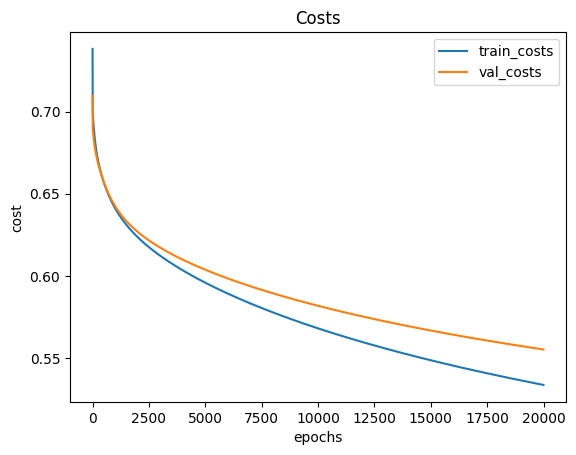

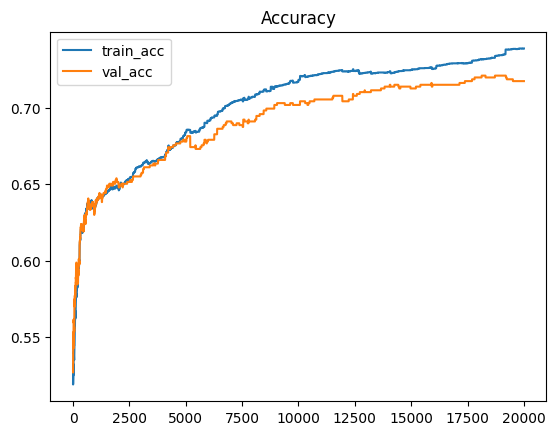

In [36]:
model = Logistic()
model.fit(X, T, show_fig=True, l1= 10e-12, usecupy=True, learning_rate = 10e-8, epochs = 20000)

In [3]:
x = cp.random.randn(10, 2)
np.argmax(x.get(), axis = 1)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [21]:
0.2*X.shape[0]

1671.0